# Laboratory setup

In [7]:
import matplotlib.pyplot as plt
import numpy as np

## Parameters

In [8]:
# Width and height of individual panels of the ASIST tank
PANEL_WIDTH = 23/11
PANEL_HEIGHT = 2

# We have a total of 19 panels
SUSTAIN_WIDTH = 23
SUSTAIN_HEIGHT = 2

#resting water depth, need to fix KRD
H = 0.8 

#irgason, combined positions from two runs
irgason1 = (7.15, SUSTAIN_HEIGHT - 0.6)
irgason2 = (9.55, SUSTAIN_HEIGHT - 0.6)
irgason3 = (11.98, SUSTAIN_HEIGHT - 0.6)

# UDM positions 
udm = [3.40, 6.25, 8.85, 11.31, 13.96]

#wave wires (combined posistions from 2 runs)
wave_wire = [1.53, 6.14, 9.30, 10.80, 14.0]

#pressure ports (16.32 only on last run)
static_pressure = [1.68, 3.51, 5.34, 7.17, 9.00, 10.83, 12.66, 14.49, 16.32]

#Pitot + hotfilm
pitot = 9.85

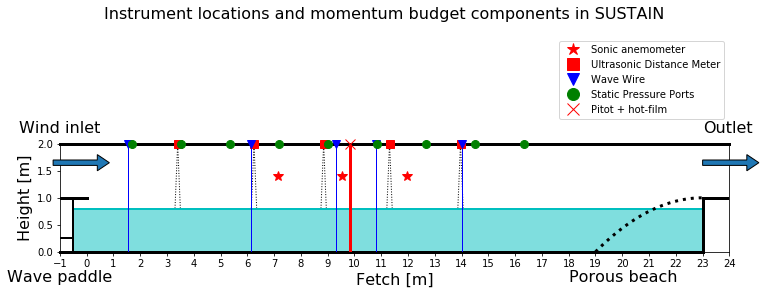

In [15]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, xlim=(-1, SUSTAIN_WIDTH + 1), ylim=(0, SUSTAIN_HEIGHT))

for u in udm:
    plt.plot(u, 2, 'rs', ms=8, clip_on=False, zorder=5)
    plt.plot([u, u - 0.1], [2, H], 'k:', lw=1)
    plt.plot([u, u + 0.1], [2, H], 'k:', lw=1)
    
#irgason placement
plt.plot(irgason1[0], irgason1[1], 'r*', ms=10, clip_on=False, zorder=5)
plt.plot(irgason2[0], irgason2[1], 'r*', ms=10, clip_on=False, zorder=5)
plt.plot(irgason3[0], irgason3[1], 'r*', ms=10, clip_on=False, zorder=5)

#water
plt.plot([-0.5, SUSTAIN_WIDTH], [H, H], 'c-', lw=2)
plt.fill_between([-0.5, SUSTAIN_WIDTH], [H, H], color='c', alpha=0.5)

# beach
x = np.linspace(19,23, 30)
y = (-1/16)*(x-23)**2+1
plt.plot(x,y, 'k:', lw=3)
plt.text(18, -0.55, 'Porous beach', fontsize=16)

# inlet
plt.plot([-1, 0], [1, 1], 'k-', lw=3)
plt.plot([-0.5, -0.5], [0, 1], 'k-', lw=2)
plt.plot([-1, -0.5], [0.25, 0.25], 'k-', lw=2)
plt.arrow(-1.25, 1.65, 1.65, 0, width=0.1, clip_on=False, zorder=5)
plt.text(-1, 2.2, 'Wind inlet', zorder=10, fontsize=16, ha='center')
plt.text(-1, -0.55, 'Wave paddle', fontsize=16, ha='center')

# outlet
plt.plot([SUSTAIN_WIDTH, SUSTAIN_WIDTH], [0, 1], 'k-', lw=3)
plt.plot([SUSTAIN_WIDTH, SUSTAIN_WIDTH + 1], [1, 1], 'k-', lw=3)
plt.arrow(SUSTAIN_WIDTH, 1.65, 1.65, 0, width=0.1, clip_on=False, zorder=5)
plt.text(SUSTAIN_WIDTH, 2.2, 'Outlet', fontsize=16)

# tank
plt.plot([-1, SUSTAIN_WIDTH + 1], [2, 2], 'k-', lw=3, clip_on=False)
plt.plot([-1, SUSTAIN_WIDTH], [0, 0], 'k-', lw=3, clip_on=False)

# plt.plot([udm[0], udm[0]], [2, 2.4], 'r-', clip_on=False)
# plt.plot([udm[4], udm[4]], [2, 2.4], 'r-', clip_on=False)
# plt.plot([udm[0], udm[4]], [2.4, 2.4], 'r-', clip_on=False)
# plt.text((udm[0] + udm[4]) / 2, 2.45, r'$\dfrac{\partial h}{\partial x}$, $\dfrac{\partial S_{xx}}{\partial x}$', ha='left', va='bottom', color='r', fontsize=16)

for w in wave_wire:
    plt.plot(w, 2, 'bv', ms=8, clip_on=False, zorder=5)
    plt.plot([w, w ], [2, 0], 'b', lw=1)
    

for p in static_pressure:
    plt.plot(p, 2, 'go', ms=8, clip_on=False, zorder=5)
    #plt.plot([p, p ], [2, 0], 'b', lw=1)

plt.plot(pitot, 2, 'rx', ms=10, clip_on=False, zorder=5)
plt.plot([pitot,pitot], [2, 0], 'r', linewidth = 3)

plt.plot(np.nan, np.nan, 'r*', ms=12, label='Sonic anemometer')
plt.plot(np.nan, np.nan, 'rs', ms=12, label='Ultrasonic Distance Meter')
plt.plot(np.nan, np.nan, 'bv', ms=12, label = "Wave Wire")
plt.plot(np.nan, np.nan, 'go', ms=12, label = "Static Pressure Ports")
plt.plot(np.nan, np.nan, 'rx', ms=12, label = "Pitot + hot-film")

plt.legend(bbox_to_anchor=(0.9, 0.9), bbox_transform=plt.gcf().transFigure)

plt.xlabel('Fetch [m]', fontsize=16)
plt.ylabel('Height [m]', fontsize=16)
plt.xticks(np.arange(-1,25,1))

fig.suptitle('Instrument locations and momentum budget components in SUSTAIN', fontsize=16)
fig.subplots_adjust(bottom=0.3, top=0.6)